# Novel Drug trends apporved by FDA since 2015 -Scrapy project

Drugs data were scraped using Scrapy from FDA website from 2015 till March 10, 2021. 

The objective of the study:
1) Gain insight of the trend of drug-innovation?
2) What medical fields are represented by the Noval drugs?
3) What is the dosage form of the drugs?
4) What companies are making more noval drugs?


In [432]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [433]:
#loading the data
fda = pd.read_csv("fda1.csv")

In [434]:
#inspecting the data
fda.head()

,RLD,RS,TE_code,active_ingredients,company,dosageform_route,drug_class,drug_name,marketing_status,review_priority,strength,use,rare,hereditary,medical_area,specific,gender,year
0,TBD,No,None,necitumumab,ELI LILLY CO,"INJECTABLE;INTRA-ARTICULAR, INTRAMUSCULAR, INT...",NaN,Portrazza,Prescription,NaN,800MG/50ML,To treat patients with advanced (metastatic) s...,no,no,cancer,Lung,adults,11/24/2015
1,No,No,None,elotuzumab,BRISTOL MYERS SQUIBB,INJECTABLE;INJECTION,NaN,Empliciti,Prescription,N/A; Orphan,300MG,\n\t\t\t,no,no,cancer,Myeloma,adults,11/30/2015
2,No,No,None,elotuzumab,BRISTOL MYERS SQUIBB,INJECTABLE;INJECTION,NaN,Empliciti,Prescription,N/A; Orphan,400MG,\n\t\t\t,no,no,cancer,Myeloma,adults,11/30/2015
3,No,No,None,sebelipase alfa,ALEXION PHARM,INJECTABLE;INJECTION,NaN,Kanuma,Prescription,N/A; Orphan,20MG/10ML,To treat patients with a rare disease known as...,yes,no,digestive,lipids and cholesterol metabolism,adults,12/8/2015
4,Yes,Yes,None,alectinib,HOFFMANN-LA ROCHE,CAPSULE;ORAL,Type 1 - New Molecular Entity,Alecensa,Prescription,PRIORITY; Orphan,EQ 150MG BASE,To treat ALK-positive lung cancer,no,no,cancer,Lung,adults,12/11/2015


In [435]:
fda.shape

(446, 18)

In [436]:
#change the year to datetime
fda['year'] = pd.to_datetime(fda['year'])

In [437]:
#extracting the year column and assigning the year column to 
pd.DatetimeIndex(fda['year']).year
fda['year'] = pd.DatetimeIndex(fda['year']).year

In [438]:
#sorting the year column
fda['year'] = fda['year'].replace([2028], 2020)
fda = fda.sort_values(by = ['year'])
fda = fda.reset_index()

In [439]:
#splitting a column by first converting into column
new = fda.dosageform_route.str.split(";", n = 1, expand = True)

In [440]:
#assigning values to new two columns
fda["dosage_form"] = new[0]
fda["dosage_route"] = new[1]


In [441]:
#drop original column
fda.drop(columns = ["dosageform_route"], inplace = True)

In [442]:
#Dropping duplicates
fda2 = fda.drop_duplicates(subset = "drug_name")

To get the number of novel drugs approved by FDA

Text(0, 0.5, 'Number of drugs')

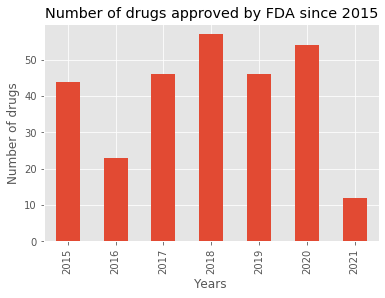

In [443]:
fda2.groupby('year')['drug_name'].nunique().plot.bar()
plt.title('Number of drugs approved by FDA since 2015')
plt.xlabel("Years")
plt.ylabel("Number of drugs")

Total of 285 drugs were approved. 2018 had maximum number of drugs(58)  and 2016 had a minimum number of drugs(23) approved.

## What medical departments do the Novel Drugs represent?

In [444]:
#creating Dataframe for the analysis of drugs representing medical departments
#replacing few values in the column
fda2['medical_area'] =fda2['medical_area'].replace(["Hereditary angioedema", "Hutchinson-Gilford Progeria Syndrome;"], 
                                                 ["skin", "metabolic"])
fda2['medical_area'] =fda2['medical_area'].replace(["insect bite"], ["vector-borne diseases"])
fda2['medical_area'] =fda2['medical_area'].replace(["mental"], ["mental health"])
fda2['medical_area'] =fda2['medical_area'].replace(["fertility"], ["gynecology"])
fda2['medical_area'] =fda2['medical_area'].replace(["nervous system"], ["neurology"])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [445]:
#Grouping the data for more unique name
group1 = fda2.groupby('medical_area')['drug_name'].nunique()
drugs_per_MD = pd.DataFrame(group1)
drugs_per_MD.columns = drugs_per_MD.columns.str.replace('drug_name', "number_of_instances")


In [446]:
drugs_per_MD = drugs_per_MD.reset_index()
type(drugs_per_MD)

pandas.core.frame.DataFrame

In [447]:
labels = drugs_per_MD["medical_area"].tolist()
areas = drugs_per_MD["number_of_instances"].tolist()
total = drugs_per_MD["number_of_instances"].sum()
total

282

Text(0.5, 1.0, 'Number of cases per medical areas')

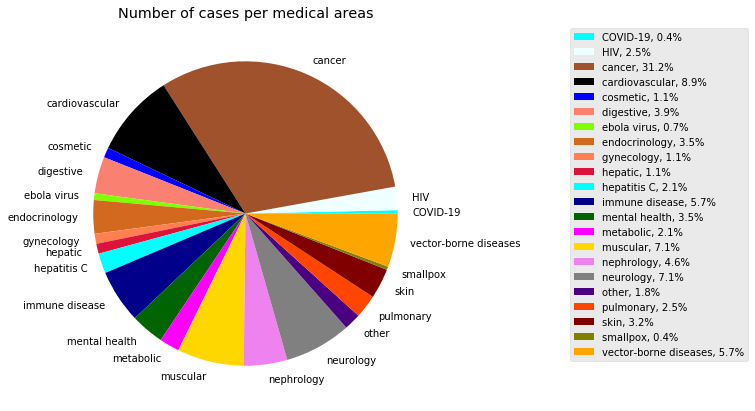

In [448]:
color = ["aqua", "azure", "sienna", "black", "blue", "salmon", "chartreuse", "chocolate", "coral", "crimson", "cyan",
        "darkblue", "darkgreen", "fuchsia", "gold", "violet", "grey", "indigo", "orangered", "maroon", "olive", "orange",
        "plum", "red"]
fig, ax = plt.subplots(figsize =(7,7)) 
ax.pie(drugs_per_MD["number_of_instances"],labels = labels, colors = color)
plt.legend(labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100)
            for l, s in zip(labels, areas)], bbox_to_anchor=(1.34,1), loc="upper left")
plt.title("Number of cases per medical areas")

Most of the drugs are related to cancer(31%). The drugs representing the cardiovascular,neurology and muscular departments are almost equal ie 8.9%, 7.1% and 7.1% respectively

## What type drugs depending upon the medical areas were approved since 2015?

Text(0, 0.5, 'number of drugs')

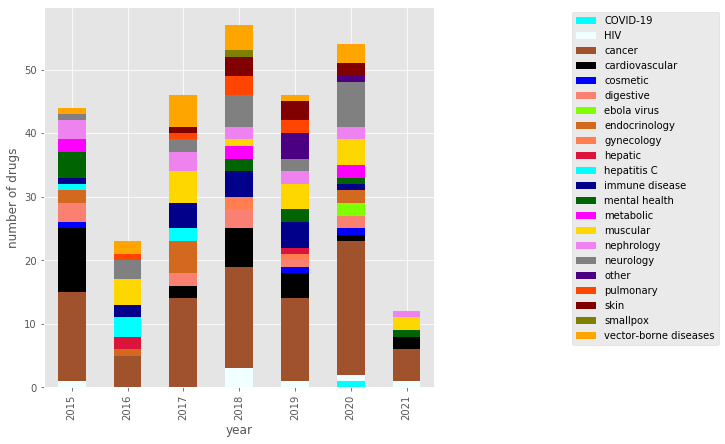

In [449]:
#getting the different medical departments the drugs represents since 2015
df = fda2.groupby(['year','medical_area'])['drug_name'].nunique().unstack()
fig, ax = plt.subplots(figsize =(7,7)) 
df.plot(kind='bar', ax = ax, color = color, stacked = True)
plt.legend(bbox_to_anchor=(1.34,1), loc="upper left")
plt.ylabel("number of drugs")

Majority of the drugs approved every year are cancer drugs. Drugs related to the percentage of Neurology were approved mostly in the year 2020. Likewise drugs related to cardiovascular system were predominent in year 2015.

The drugs related to neurology showed very interesting profile. 5 novel drugs were approved for migraine

Text(0.5, 1.0, 'Novel Drug profile under neurology')

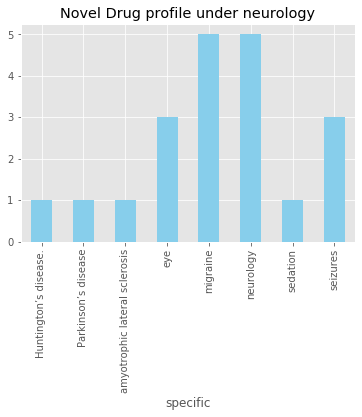

In [450]:
neuro = fda2[fda2["medical_area"] == "neurology"].groupby("specific")['specific'].count()
neuro.plot(kind = "bar", color = "skyblue")
plt.title("Novel Drug profile under neurology")

## Under cancer, what type of specific areas like blood or neurology etc were targeted by the novel drugs?

In [493]:
#Total number of unique companies got approval
fda2.company.nunique()

194

In [494]:
#Number of companies making cancer drugs
fda2[fda2["medical_area"]== "cancer"].company.nunique()

73

Out of 194 unique companies in the data 73 companies(around 38%) are focussed on cancer drugs approval.

In [451]:
#Replacing values of column
fda2["specific"] = fda2["specific"].replace(["Lung", "lung", "lungs","thyroid"], ("Lung and thyroid"))

fda2["specific"] = fda2["specific"].replace((["Myeloma", "bone marrow"]), ("blood"))
fda2["specific"] = fda2["specific"].replace((["endocrine location", "imaging"]), ("cancer location"))
fda2["specific"] = fda2["specific"].replace((["colorectal", "gastrointestinal"]), ("digestive"))
fda2["specific"] = fda2["specific"].replace(("neuroblastoma"), ("nervous system"))
fda2["specific"] = fda2["specific"].replace(("muscle"), ("bone"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [452]:
fda2["specific"] = fda2["specific"].replace((["gastroenteropancreatic "]), ("digestive"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

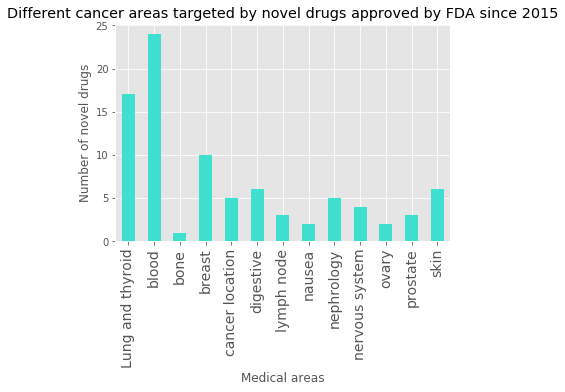

In [453]:
#filtering only the cancer data to view what specific areas the drugs targeted.
df2 = fda2[fda2['medical_area'] == "cancer"].groupby("specific")['specific'].count()
df2.plot(kind='bar', color = "turquoise")
plt.title("Different cancer areas targeted by novel drugs approved by FDA since 2015")
plt.xlabel("Medical areas")
plt.ylabel("Number of novel drugs")
plt.xticks(fontsize = 14)

Mostly cancer drugs were targeted blood related cancers followed by lung, breast and skin cancers

## What is the dosage form for the novel drugs in the cancer?

In [454]:
fda2['dosage_form'] = fda2['dosage_form'].replace(['TABLET, DELAYED RELEASE', 'TABLET, EXTENDED RELEASE',
                                                  'TABLET, ORALLY DISINTEGRATING', 'TABLET, TABLET'], ("TABLET"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [455]:
fda2['dosage_form'] = fda2['dosage_form'].replace(['POWDER, FOR INJECTION SOLUTION, LYOPHILIZED POWDER'],("POWDER"))
fda2['dosage_form'] = fda2['dosage_form'].replace(['SUSPENSION, EXTENDED RELEASE', 'FOR SUSPENSION'],("SUSPENSION"))
fda2['dosage_form'] = fda2['dosage_form'].replace(['SOLUTION/DROPS', 'FOR SOLUTION'],("SOLUTION"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0.5, 1.0, 'Dosage form of the novel drugs')

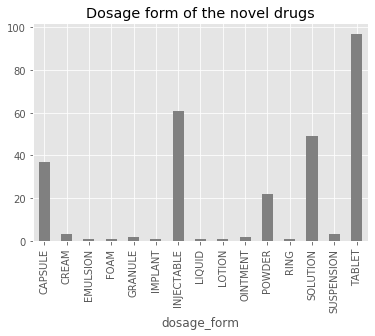

In [456]:
#getting the overall count of the different dosage_form for the novel drugs
dos1 = fda2.groupby(["dosage_form"])["dosage_form"].count()
dos1.plot(kind = "bar", color = "grey")
plt.title("Dosage form of the novel drugs")

In [457]:
#selecting only the capsule injectable,solution and tablet for cancer drug analysis
dosage = fda2[fda2["dosage_form"].isin(["CAPSULE", "INJECTABLE", "SOLUTION", "TABLET", "POWDER"])]

Text(0.5, 1.0, 'Dosage form for approved cancer drugs')

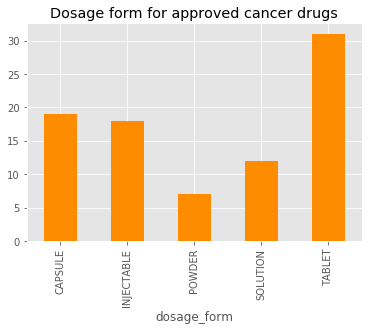

In [458]:
# selecting only the cancer data to get the dosage form of cancer drugs
cancer_dose = dosage[dosage["medical_area"] == "cancer"]
can_dos1 = cancer_dose.groupby("dosage_form")["dosage_form"].count()
can_dos1.plot(kind = "bar", color = "darkorange")
plt.title("Dosage form for approved cancer drugs")

In [459]:
#What is the dosage form for specific cancer groups
cancer_dose.groupby(["dosage_form", "specific"])["specific"].count()

dosage_form  specific        
CAPSULE      Lung and thyroid    7
             blood               5
             breast              3
             lymph node          1
             nephrology          1
             nervous system      1
             skin                1
INJECTABLE   Lung and thyroid    2
             blood               7
             breast              3
             nephrology          2
             nervous system      2
             ovary               1
             skin                1
POWDER       Lung and thyroid    2
             blood               3
             bone                1
             cancer location     1
SOLUTION     Lung and thyroid    1
             blood               2
             cancer location     4
             digestive           1
             lymph node          1
             nausea              1
             nephrology          1
             nervous system      1
TABLET       Lung and thyroid    5
             blood       

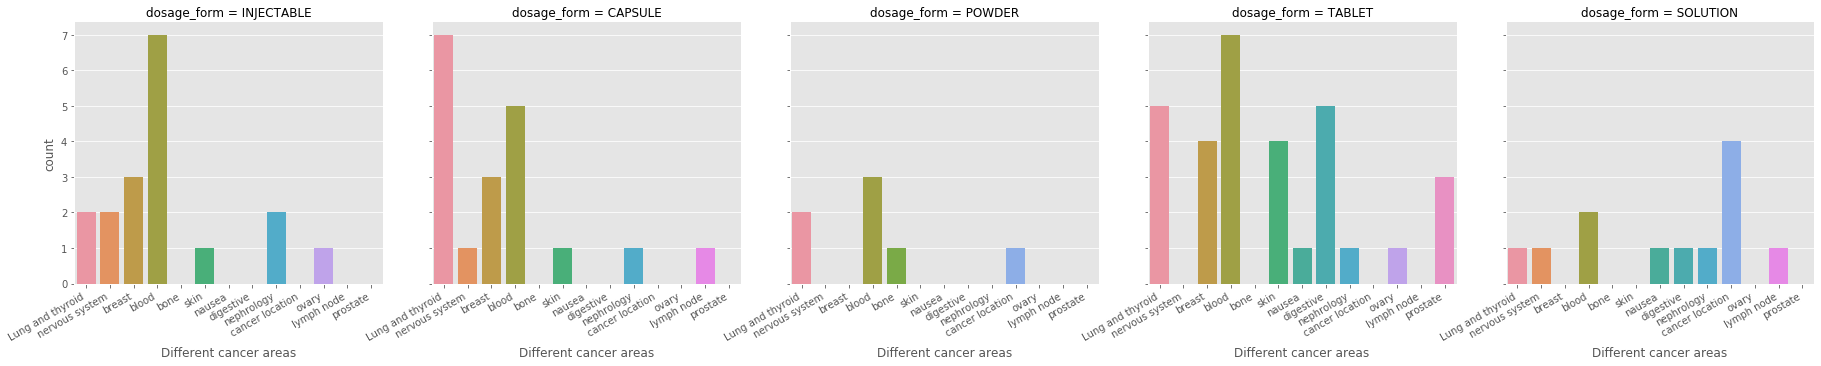

In [460]:
#facet grid plot(seaborn) to compare different dosage form of cancer drugs
g = sns.catplot(x = "specific", kind = "count", col = "dosage_form", data = cancer_dose)
g.fig.autofmt_xdate()
g.set(xlabel = "Different cancer areas")

Novel drugs targeting the blood cancer is either tablets or injectibles while the durgs related to lung cancer are mostly capsules.

## What is the review priority for the novel drugs and the novel cancer drugs? 

In [461]:
# Changing the review priority to dataframe so that the count can be made in seperate column
drug_review = fda2.groupby("review_priority")["review_priority"].count()
drug_review = pd.DataFrame(drug_review)


In [462]:
drug_review["no_of_cases"] = drug_review["review_priority"].to_list()
drug_review = drug_review.drop(columns = "review_priority")
drug_review = drug_review.reset_index()

In [463]:
#Changing the review priority orphan groups into a single orphan group
drug_review["review_priority"] = drug_review["review_priority"].replace(["N/A; Orphan","PRIORITY; Orphan", "STANDARD; Orphan"], 
                                                                   ("Orphan"))

In [464]:
#getting the total sum of number of drugs per review priority group
drug_review1 = drug_review.groupby("review_priority")["no_of_cases"].sum()
drug_review1

review_priority
Orphan      137
PRIORITY     50
STANDARD     61
Name: no_of_cases, dtype: int64

Text(0.5, 1.0, 'Pie Chart based on review priority')

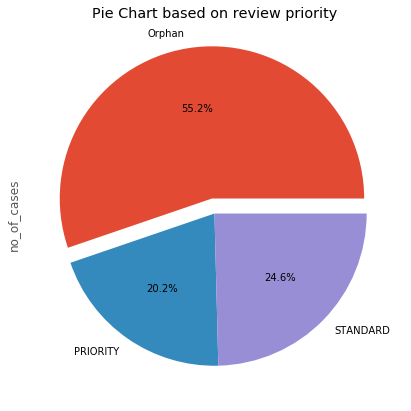

In [465]:
#plotting pie chart
explode = (0.1, 0, 0)
drug_review1.plot.pie(autopct='%1.1f%%',figsize=(7,7),explode = explode)
plt.title("Pie Chart based on review priority")

Around 55% of drugs approved by FDA falls under the orphan or the rare drugs group folowed by standard and priority class. 

In [466]:
#Changing the review priority orphan groups into a single orphan group
cancer_dose["review_priority"] = cancer_dose["review_priority"].replace(["N/A; Orphan","PRIORITY; Orphan", "STANDARD; Orphan"],("Orphan"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Pie chart based on review priority for cancer drugs')

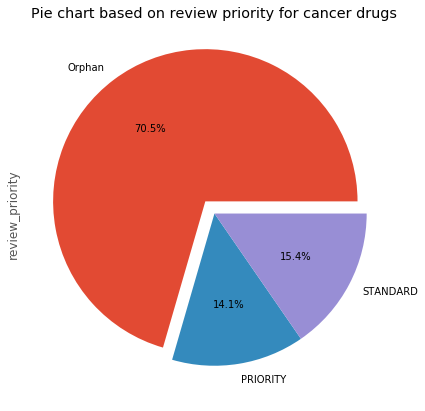

In [467]:
#Getting the count of cancer drugs for each review priority groups and plotting a pie chart
cancer_review = cancer_dose.groupby("review_priority")['review_priority'].count()
explode = (0.1, 0, 0)
cancer_review.plot.pie(autopct='%1.1f%%',figsize=(7,7),explode = explode)
plt.title("Pie chart based on review priority for cancer drugs")

In case of cancer, an overwhelming amount of drgs were approved under rare class. Deep insight of the study shows that most of the cancer drugs were addressed for relapse cases or where the patient has gone certain cancer treatment before and not shown any improvement. 

# # How many companies get approval for multiple drugs?

In [468]:
#getting the company name of all the unique drugs. The list of company have more than ne noval drug approvals
fda2_group = fda2.groupby(["company"])["company"].count()
print(len(fda2_group[fda2_group>1]))
#selecting the data for more than 3 drug approvals
p = (fda2_group[fda2_group>3])
fda2_group.max()

44


7

There were 44 companies which have more than one drug approvals. The maximum is 7 for a single company filed(GENETECH INC) and 10 drugs combined for NOVARTIS PHARMS CORP and NOVARTIS.

Text(0, 0.5, 'number of noval drugs approved')

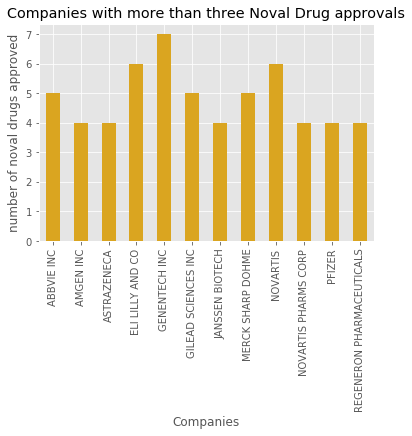

In [469]:
#plotting the bar plot for the companies more than 3 drug approvals
p.plot(kind = 'bar', color = "goldenrod")
plt.title("Companies with more than three Noval Drug approvals")
plt.xlabel("Companies")
plt.ylabel("number of noval drugs approved")

In [470]:
# subsetting the data for the companies more than 3 drug approvals and merging the data of Novartis 
#and Novartis Pharma Corp.
top_company = fda2[fda2["company"].isin(['ELI LILLY AND CO', 'GENENTECH INC',
                                         'GILEAD SCIENCES INC',"MERCK SHARP DOHME",
                                         'NOVARTIS', 'NOVARTIS PHARMS CORP'])]
top_company["company"] = top_company["company"].replace('NOVARTIS PHARMS CORP', 'NOVARTIS')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


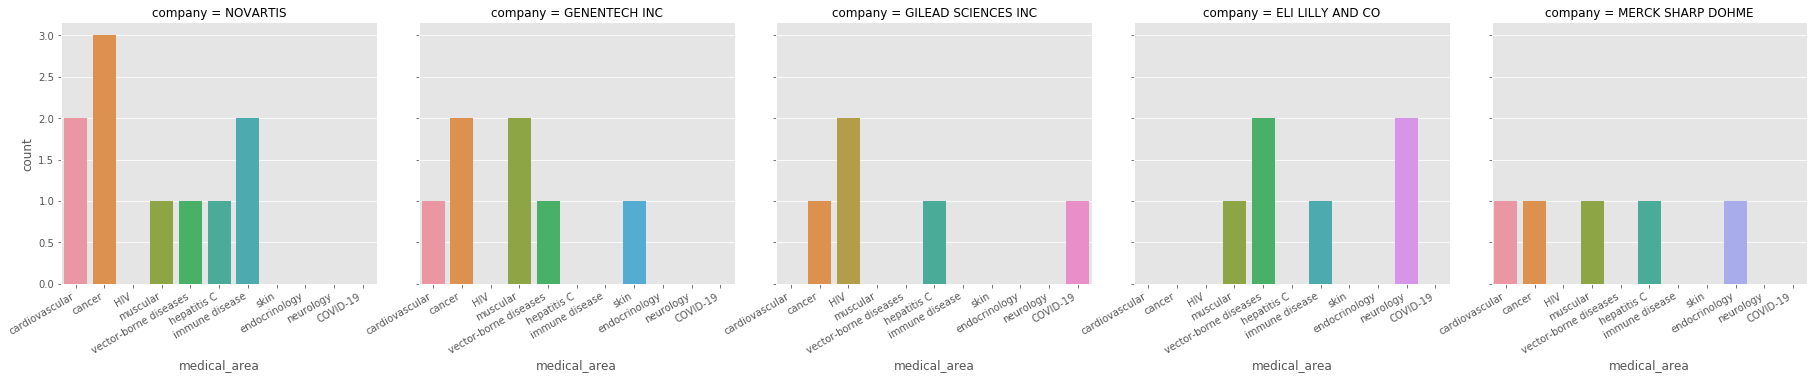

In [471]:
#Comparative study of top 5 companies and the medical areas that was targeted.
g = sns.catplot(x = "medical_area", kind = "count", col = "company", data = top_company)
g.fig.autofmt_xdate()

There is quite a range of medical areas that the top 5 companies have covered. Novartis has main areas are cancer, cardiovascular and immune disease while Eli Lilly focussed mainly on vector-born diseases and neurology

## Lets focus on the top company with maximum number of drug approvals - Novartis

Lets dig deep into various component of novel Drugs by Novartis.

In [472]:
#Selecting the data for only Novartis company
novartis = fda2[fda2["company"].isin(['NOVARTIS', 'NOVARTIS PHARMS CORP'])]

In [473]:
#The medical areas which the company targetted
novartis.groupby("medical_area")["medical_area"].count()

medical_area
cancer                   3
cardiovascular           2
hepatitis C              1
immune disease           2
muscular                 1
vector-borne diseases    1
Name: medical_area, dtype: int64

Text(0.5, 1.0, 'Novartis Novel drugs profile from different medical department since 2015')

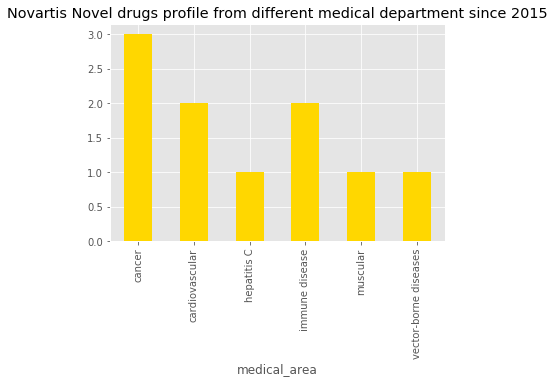

In [474]:
#Plotting the bar graph for different medical areas the company focussed
nov = novartis.groupby("medical_area")["medical_area"].count()
nov.plot(kind = "bar", color = "gold")
plt.title("Novartis Novel drugs profile from different medical department since 2015")

Digging deep to get within each medical area what specific disese were targeted

Text(0.5, 1.0, 'Cancer')

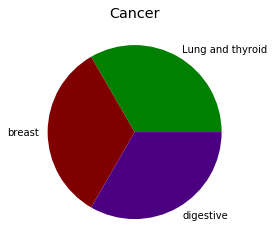

In [475]:

#first the cancer drugs
nov_can = novartis[novartis["medical_area"] == "cancer"].groupby('specific')["specific"].count()
fig, ax = plt.subplots(figsize =(4,4))
nov_can.plot.pie(ax = ax, colors = ["green", "maroon", "indigo"])
ax.set_ylabel('')
plt.title("Cancer")

Text(0.5, 1.0, 'cardiovascular')

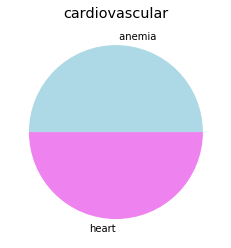

In [476]:
#The cardiovascular drugs
nov_card = novartis[novartis["medical_area"] == "cardiovascular"].groupby('specific')["specific"].count()
fig, ax = plt.subplots(figsize =(4,4))
nov_card.plot.pie(ax = ax, colors = ["lightblue", "violet"])
ax.set_ylabel('')
plt.title("cardiovascular")

Text(0.5, 1.0, 'immune disease')

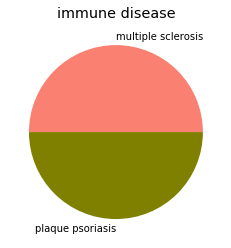

In [477]:
#immune disease
nov_mus = novartis[novartis["medical_area"] == "immune disease"].groupby('specific')["specific"].count()
fig, ax = plt.subplots(figsize =(4,4))
nov_mus.plot.pie(ax = ax, colors = ["salmon", "olive"])
ax.set_ylabel('')
plt.title("immune disease")

Novartis drugs covered lung,digestive and breast under cancer drugs, anemia and heart issues under cardiovascular drugs and two auto-immune disorder multiple-sclerosis and plaque psoriasis

Next, Let's see what is the dosage form of the various drugs

Text(0.5, 1.0, 'The dosage-form of Novel drugs (Novartis)')

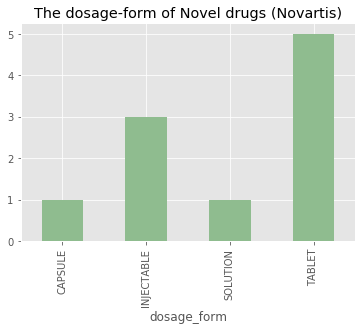

In [478]:
#Plotting the bar graph for different dosage form
nov_dose = novartis.groupby('dosage_form')['dosage_form'].count()
nov_dose.plot(kind = "bar", color = "darkseagreen")
plt.title("The dosage-form of Novel drugs (Novartis)")


Mostly the dosage form of the drugs are the solid dosage form ie capsules and tablets

Text(0.5, 1.0, 'Dosage form based on medical areas')

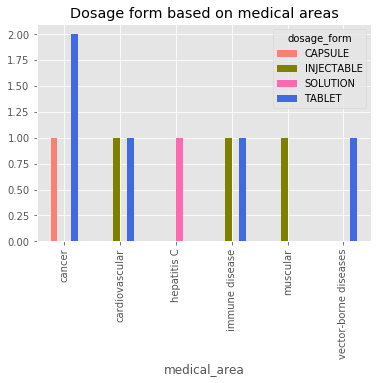

In [479]:
#The drugs of different medical areas and corresponding dosage form
nov_dose1 = novartis.groupby(['dosage_form','medical_area'])['dosage_form'].count().unstack(0)
nov_dose1.plot(kind = "bar", color = ["salmon", "olive", "hotpink", "royalblue"])
plt.title('Dosage form based on medical areas')

The cancer drugs have capsule and tablet form while injectibles are mainly in the cardiovascular and muscular departments

In [480]:
#merging all the the review priority corresponding to orphan to single orphan group
novartis["review_priority"] = novartis["review_priority"].replace(["N/A; Orphan","PRIORITY; Orphan", "STANDARD; Orphan"],("Orphan"))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


To check the review priority and the gender the drug targets to see whether any particular gender groups falls under rare group(orphan).

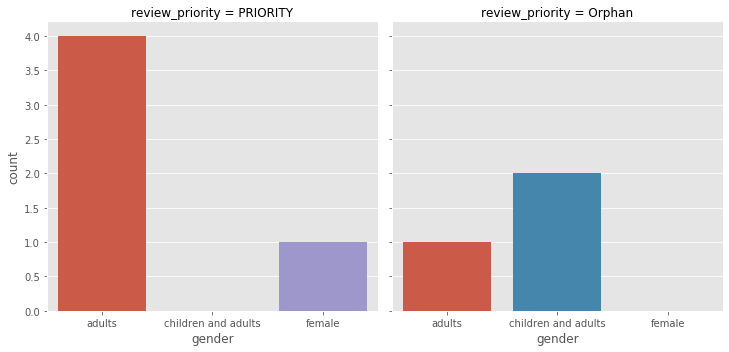

In [482]:
#Review Priority vs Gender
g = sns.catplot(x = "gender", kind = "count", col = "review_priority", data = novartis)


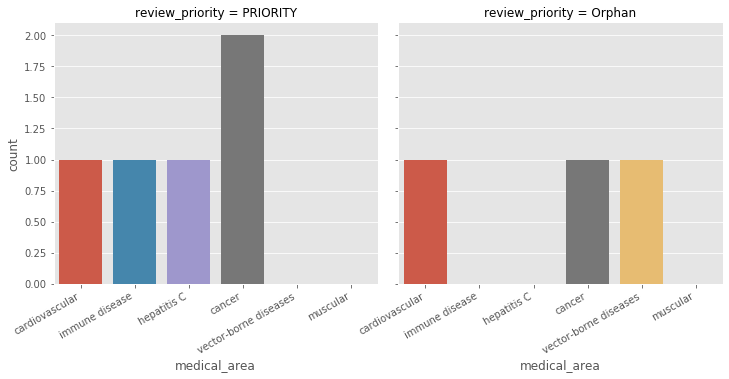

In [485]:
#review priority vs medical area
g = sns.catplot(x = "medical_area", kind = "count", col = "review_priority", data = novartis)
g.fig.autofmt_xdate()

Review Priority shows that generally drugs meant for children are under rare groups. Medical groups doesn't show much of any pattern with the review priority. It depend upon the the case by case study.

# # Study in Nutshell

- Since 2015, 285 drugs were approved by FDA till March 10, 2021 covering quite a range of  medical fields. 2018 was the most successful year in terms of the drug approval with 59 drugs approved while 2016 was the lowest with only 22 drug approval.

- Most of the drugs are related to cancer(31%). Second is the cardiovascular followed by neurology and muscular department

- Out of 194 unique companies in the data 73 companies(around 38%) are focussed on cancer drugs approval.

- Maximum approved drugs are for blood cancer followd by lung cancer and breast cancer. The dosage form of the cancer drugs are of solid dosage form ie capsules and tablets. 70% of the cancer drugs are approved under orphan(rare disease category)

- More tha 44 companies got more than one approved drug since 2015. Novartis has a maximum approval of 10 novel drugs.

- Novartis has a quite range for drugs corresponding to different medical areas. The cancer was on the top followed by cardivascular and immune disease. Drugs targetting all the gender got approval. Review Priority shows that generally drugs meant for children are under rare groups. Medical groups doesn't show much of any pattern with the review priority. It depend upon the the case by case study.